<a href="https://colab.research.google.com/github/bee2502/yelp-reviews-data-analysis/blob/master/EDAReviews_changed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
%matplotlib inline



Mounted at /content/gdrive


In [0]:
import seaborn as sns

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#misc
import gc
import time
import warnings


#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap


#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict


ModuleNotFoundError: ignored

In [0]:
!pip install imageio
!pip install --upgrade --user matplotlib numpy pyproj pyshp OWSLib Pillow

    100% |████████████████████████████████| 3.3MB 8.0MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio


In [37]:
!ls -ltr gdrive/"My Drive"



total 8340096
-rw------- 1 root root          1 Apr 23  2018 'talkscripts_all_edited_20180307(1).gsheet'
-rw------- 1 root root          1 Apr 24  2018 'Copy of talkscripts_all_edited_20180307(1).gsheet'
-rw------- 1 root root          1 Apr 25  2018 'talkscripts_all_edited_20180307(1) (1).gsheet'
-rw------- 1 root root          1 Jun 12 20:48 'Untitled spreadsheet.gsheet'
-rw------- 1 root root          1 Jun 14 14:58 'Untitled spreadsheet (1).gsheet'
-rw------- 1 root root   11160765 Sep 11 11:17  app.bao-solutions.com.tar.gz
-rw------- 1 root root     281619 Sep 11 23:25  jbpservice.tar.gz
-rw------- 1 root root   35257175 Sep 25 21:58  html.tar.gz
-rw------- 1 root root     252046 Oct 15 22:35  bao_ColdCalling_Script.pdf
-rw------- 1 root root   58574047 Nov 14 09:11  coldcalling.zip
drwx------ 2 root root       4096 Nov 19 00:26 'Colab Notebooks'
-rw------- 1 root root 4269133614 Nov 19 09:20  yelp_academic_dataset_review.csv
-rw------- 1 root root 2188485470 Nov 19 09:31  yelp_ac

In [0]:
PATH_TO_REVIEW_FILE = "/content/gdrive/My Drive/yelp_academic_dataset_review.csv"
PATH_TO_BUSINESS_FILE = "/content/gdrive/My Drive/yelp_academic_dataset_business.csv"
PATH_TO_USER_FILE = "/content/gdrive/My Drive/yelp_academic_dataset_user.csv"

In [0]:
PATH_TO_CHECKIN_FILE = "/content/gdrive/My Drive/yelp_checkin.csv"

In [0]:
reviews = pd.read_csv(PATH_TO_REVIEW_FILE, sep='\t')
users=pd.read_csv(PATH_TO_USER_FILE, sep='\t')
business=pd.read_csv(PATH_TO_BUSINESS_FILE, sep='\t')

FileNotFoundError: ignored

In [0]:
checkin=pd.read_csv(PATH_TO_CHECKIN_FILE)

In [0]:
checkin.dtypes


time.Wed-17    float64
time.Wed-2     float64
time.Sun-4     float64
time.Sun-7     float64
time.Mon-12    float64
time.Mon-20    float64
time.Tue-16    float64
time.Thu-22    float64
time.Fri-21    float64
time.Sun-9     float64
time.Fri-6     float64
time.Wed-9     float64
time.Sun-2     float64
time.Fri-8     float64
time.Mon-6     float64
time.Thu-9     float64
time.Thu-20    float64
time.Sun-11    float64
time.Tue-7     float64
time.Sun-20    float64
time.Tue-8     float64
time.Wed-1     float64
time.Sun-23    float64
time.Thu-10    float64
time.Fri-12    float64
time.Sun-19    float64
time.Thu-1     float64
time.Mon-18    float64
time.Thu-5     float64
time.Sun-15    float64
                ...   
time.Wed-20    float64
time.Tue-11    float64
time.Thu-13    float64
time.Wed-22    float64
time.Fri-16    float64
time.Tue-21    float64
time.Thu-0     float64
time.Tue-6     float64
time.Sun-13    float64
time.Tue-23    float64
time.Tue-9     float64
time.Tue-18    float64
time.Mon-2 

In [0]:
users.name = users.name.str.strip('b\'')
users.yelping_since = users.yelping_since.str.strip('b\'')
users.elite = users.elite.str.strip('b\'')
users.user_id = users.user_id.str.strip('b\'')

In [0]:
user_agg=reviews.groupby('user_id').agg({'review_id':['count'],'date':['min','max'],
                                'useful':['sum'],'funny':['sum'],'cool':['sum'],
                               'stars':['mean']})

In [0]:
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id           date                useful  \
                              count            min            max    sum   
user_id                                                                    
b'CxDOIDnH8gp9KXzpBHJYXw'      3739  b'2009-11-09'  b'2018-06-27'  12835   
b'bLbSNkLggFnqwNNzzq-Ijw'      2229  b'2012-05-20'  b'2018-07-01'  26910   
b'PKEzKWv_FktMm2mGPjwd0Q'      1674  b'2008-12-12'  b'2018-07-01'  12804   
b'DK57YibC5ShBmqQl97CKog'      1574  b'2006-02-12'  b'2018-07-01'  19096   
b'QJI9OSEn6ujRCtrX06vs1w'      1324  b'2007-03-20'  b'2016-05-01'   8791   
b'd_TBs6J3twMy9GChqUEXkg'      1245  b'2010-12-27'  b'2018-05-29'   3149   
b'hWDybu_KvYLSdEFzGrniTw'      1220  b'2009-03-08'  b'2018-06-11'   8170   
b'ELcQDlf69kb-ihJfxZyL0A'      1204  b'2011-04-10'  b'2018-06-29'   2243   
b'cMEtAiW60I5wE_vLfTxoJQ'      1201  b'2009-06-12'  b'2018-06-26'   2246   
b'YRcaNlwQ6XXPFDXWtuMGdA'      1195  b'2009-06-16'  b'2018-05-05'   2630   

                           funny   cool     stars  
                             sum    sum      mean  
user_id                                            
b'CxDOIDnH8gp9KXzpBHJYXw'   5883   7606  3.218775  
b'bLbSNkLggFnqwNNzzq-Ijw'  13851  18481  3.274114  
b'PKEzKWv_FktMm2mGPjwd0Q'   5259   8724  3.658303  
b'DK57YibC5ShBmqQl97CKog'  10150  16319  3.817662  
b'QJI9OSEn6ujRCtrX06vs1w'   4118   6159  3.621601  
b'd_TBs6J3twMy9GChqUEXkg'   1443   1902  3.478715  
b'hWDybu_KvYLSdEFzGrniTw'   5459   6517  3.650000  
b'ELcQDlf69kb-ihJfxZyL0A'   1352   1058  2.989203  
b'cMEtAiW60I5wE_vLfTxoJQ'    967   1761  4.081599  
b'YRcaNlwQ6XXPFDXWtuMGdA'   1088   1262  3.395816

In [0]:
#Stalking the top user:
top_user_reviews=reviews[reviews['user_id']=='CxDOIDnH8gp9KXzpBHJYXw']
# Get locations of the places he/she has reviewed
top_user_locs=pd.merge(top_user_reviews,business,on='business_id')
# UNique list of dates from the user's reviews
date_list=list(top_user_locs['date'].unique())
#rearranging data to suit the format needed for folium
data=[]
for date in date_list:
    subset=top_user_locs[top_user_locs['date']==date]
    df=subset[['latitude','longitude','date']]
    data.append(subset[['latitude','longitude']].values.tolist())

In [0]:
#initialize at ontario,Canada (the location our top user is from)
lat = 43.860397
lon = -79.303184
zoom_start=9
print("                     Stalking the top User    ")
# basic map
m = folium.Map(location=[lat, lon], tiles="Cartodb Positron", zoom_start=zoom_start)

hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True)
hm.add_to(m)
m

                     Stalking the top User    


In [0]:
!pip install folium

    100% |████████████████████████████████| 81kB 2.5MB/s 


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



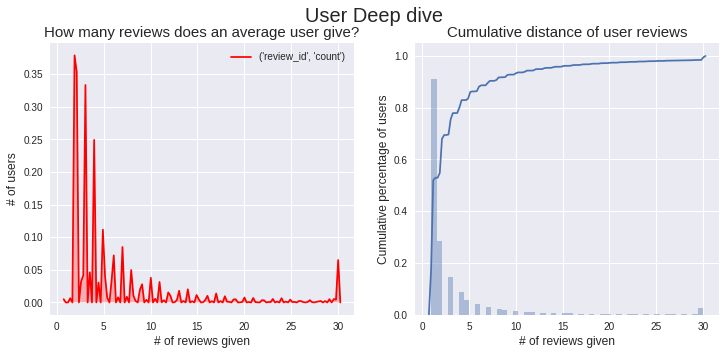

Took -3.361701965332031e-05 s


NameError: ignored

In [0]:
# Cap max reviews to 30 for better visuals
user_agg[('review_id','count')].loc[user_agg[('review_id','count')]>30] = 30
plt.figure(figsize=(12,5))
plt.suptitle("User Deep dive",fontsize=20)
gridspec.GridSpec(1,2)
plt.subplot2grid((1,2),(0,0))
#Cumulative Distribution
ax=sns.kdeplot(user_agg[('review_id','count')],shade=True,color='r')
plt.title("How many reviews does an average user give?",fontsize=15)
plt.xlabel('# of reviews given', fontsize=12)
plt.ylabel('# of users', fontsize=12)

#Cumulative Distribution
plt.subplot2grid((1,2),(0,1))
sns.distplot(user_agg[('review_id','count')],
             kde_kws=dict(cumulative=True))
plt.title("Cumulative distance of user reviews",fontsize=15)
plt.ylabel('Cumulative percentage of users', fontsize=12)
plt.xlabel('# of reviews given', fontsize=12)

plt.show()
end_time=time.time()
start_time=time.time()
print("Took",end_time-start_time,"s")


In [0]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [0]:
#checkins exploration
df=checkin.groupby(['weekday','hour'])['checkins'].sum()
df=df.reset_index()
df=df.pivot(index='hour',columns='weekday')[['checkins']]
df.columns = df.columns.droplevel()
df=df.reset_index()
# Workaround for not being able to sort the values by hour
df.hour=df.hour.apply(lambda x: str(x).split(':')[0])
df.hour=df.hour.astype(int)
# Sort the hour column 
df=df.sort_values('hour')
df=df[['hour','Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun' ]]
# df=df.set_index('hour')
cm = sns.light_palette("orange", as_cmap=True)
#highlight the max of each column
df.style.apply(highlight_max, color='darkorange', axis=0)

KeyError: ignored

In [0]:
#https://python-graph-gallery.com/125-small-multiples-for-line-chart/  
# Initialize the figure
plt.style.use('seaborn-darkgrid')
# create a color palette
palette = plt.get_cmap('Set1')
plt.figure(figsize=(10,10))
plt.suptitle("Checkins variation across time",fontsize=20)
gridspec.GridSpec(3,3)
plt.subplots_adjust(hspace=0.4)

# multiple line plot
num=0
for column in df.drop('hour', axis=1):
    num+=1
    # Find the right spot on the plot
    
    if num==7:  # adjustment to fit sunday
        plt.subplot2grid((3,3),(2,0),colspan=3)
    else:
        plt.subplot(3,3, num)
    
    # plot every groups, but discreet
    for v in df.drop('hour', axis=1):
        plt.plot(df['hour'], df[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
    # Plot the lineplot
    plt.plot(df['hour'], df[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
    # Same limits for everybody!
    plt.xlim(0,24)
    plt.ylim(-2,260000)
    # Not ticks everywhere
    if num in range(4) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
       
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))
         
    plt.ylabel('# of checkin', fontsize=12)
    plt.xlabel('Time of checkins', fontsize=12)

NameError: ignored

In [0]:


nrow = checkin.shape[0]




In [0]:
checkin.head


<bound method NDFrame.head of         time.Wed-17  time.Wed-2  time.Sun-4  time.Sun-7  time.Mon-12  \
0               1.0         1.0         NaN         NaN          1.0   
1               1.0         NaN         NaN         NaN          NaN   
2               NaN         NaN         NaN         NaN          1.0   
3               NaN         NaN         NaN         NaN          NaN   
4               NaN         NaN         NaN         NaN          NaN   
5               NaN         NaN         NaN         NaN          NaN   
6               NaN         NaN         NaN         NaN          NaN   
7               NaN         NaN         NaN         NaN          1.0   
8               NaN         NaN         NaN         NaN          NaN   
9               NaN         NaN         NaN         NaN          NaN   
10              NaN         NaN         NaN         NaN          NaN   
11              NaN         NaN         NaN         NaN          NaN   
12              1.0         NaN   

In [0]:
times = [col for col in checkin.columns if 'time.' in col]
checkins = dict.fromkeys(times, 0)
for key in checkins.keys():
    checkin[key].fillna(0)
    checkins[key] = checkin[key].max()
checkins

{'time.Fri-0': 1132.0,
 'time.Fri-1': 1332.0,
 'time.Fri-10': 456.0,
 'time.Fri-11': 434.0,
 'time.Fri-12': 588.0,
 'time.Fri-13': 789.0,
 'time.Fri-14': 1115.0,
 'time.Fri-15': 1275.0,
 'time.Fri-16': 1288.0,
 'time.Fri-17': 1308.0,
 'time.Fri-18': 1308.0,
 'time.Fri-19': 1275.0,
 'time.Fri-2': 1263.0,
 'time.Fri-20': 1214.0,
 'time.Fri-21': 1281.0,
 'time.Fri-22': 1340.0,
 'time.Fri-23': 1505.0,
 'time.Fri-3': 1193.0,
 'time.Fri-4': 1220.0,
 'time.Fri-5': 1118.0,
 'time.Fri-6': 886.0,
 'time.Fri-7': 492.0,
 'time.Fri-8': 204.0,
 'time.Fri-9': 166.0,
 'time.Mon-0': 1421.0,
 'time.Mon-1': 1442.0,
 'time.Mon-10': 482.0,
 'time.Mon-11': 516.0,
 'time.Mon-12': 745.0,
 'time.Mon-13': 1039.0,
 'time.Mon-14': 1215.0,
 'time.Mon-15': 1480.0,
 'time.Mon-16': 1375.0,
 'time.Mon-17': 1283.0,
 'time.Mon-18': 1265.0,
 'time.Mon-19': 1222.0,
 'time.Mon-2': 1397.0,
 'time.Mon-20': 1188.0,
 'time.Mon-21': 1215.0,
 'time.Mon-22': 1112.0,
 'time.Mon-23': 1192.0,
 'time.Mon-3': 1301.0,
 'time.Mon-4': 12

In [0]:
pd.DataFrame.from_dict(checkins, orient='index')

,0
time.Wed-17,952.0
time.Wed-2,839.0
time.Sun-4,726.0
time.Sun-7,993.0
time.Mon-12,745.0
time.Mon-20,1188.0
time.Tue-16,1072.0
time.Thu-22,1084.0
time.Fri-21,1281.0
time.Sun-9,392.0


In [0]:


checkin[checkin['time.Sat-14']==857]



,time.Wed-17,time.Wed-2,time.Sun-4,time.Sun-7,time.Mon-12,time.Mon-20,time.Tue-16,time.Thu-22,time.Fri-21,time.Sun-9,...,time.Thu-15,time.Thu-23,time.Sun-8,time.Sun-6,time.Fri-1,time.Fri-17,time.Wed-19,time.Mon-13,time.Sun-3,time.Wed-14
14299,952.0,839.0,516.0,248.0,745.0,1188.0,971.0,1052.0,1281.0,37.0,...,1115.0,1153.0,152.0,343.0,1102.0,1308.0,971.0,1039.0,666.0,788.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


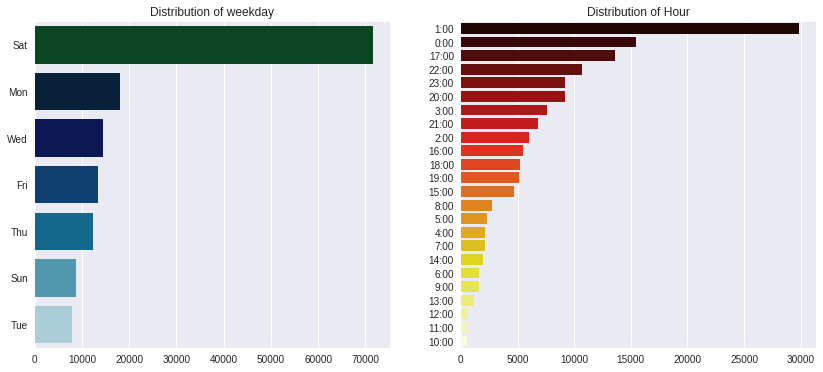

In [48]:
f,ax = plt.subplots(1,2, figsize = (14,6))
ax1,ax2, = ax.flatten()
cnt = checkin['weekday'].value_counts().to_frame()
sns.barplot(cnt['weekday'], cnt.index, palette = 'ocean', ax=ax1)
ax1.set_title('Distribution of weekday')
ax1.set_xlabel('')

cnt = checkin['hour'].value_counts().to_frame()
sns.barplot(cnt['hour'], cnt.index, palette = 'hot', ax=ax2)
ax2.set_title('Distribution of Hour')
ax2.set_xlabel('');


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


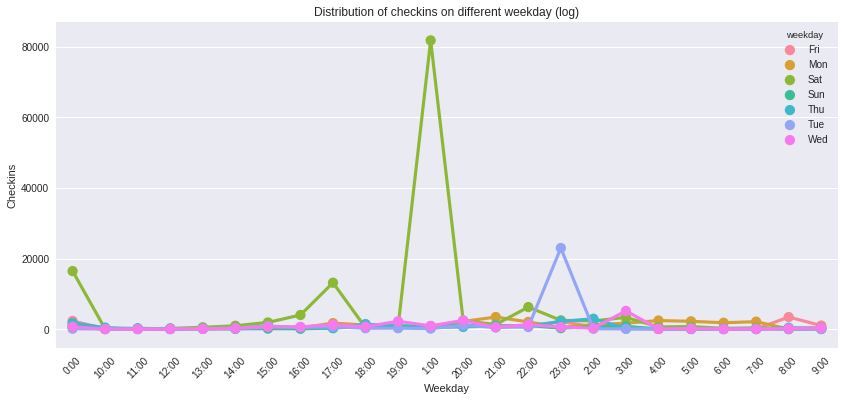

In [49]:
k = checkin.groupby(['weekday','hour',])['checkins'].sum().to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.pointplot(y = k['checkins'],x = k['hour'],hue = k['weekday'],alpha=0.3)
plt.ylabel('Checkins')
plt.title('Distribution of checkins on different weekday (log)')
plt.xlabel('Weekday')
plt.xticks(rotation=45);